In [4]:
import disk_ecc as original
import disk_ecc_warp_faceontest_ as mine
import disk_ecc_warp_restructure as restructure

import matplotlib.pyplot as plt
import numpy as np
import bettermoments as bm

In [5]:
plt.style.use('dark_background')
inc = 78
w_inc = 20
pa = 90
w_r0_param = 60
aop = 0

zcf max 448793612100000.0
zcf min -448793612100000.0
zcf tophalf max 448074967404883.9
zcf tophalf min 359322347558.0625
dz max 718644695116.125
dz min -447715645057325.8
dz shape (500, 131, 624)
X_0 0.0
X_-1 4487936121000000.0
Y_0 0.0
Y_-1 0.0
X shape (131, 180, 300)
Y shape (131, 180, 300)
Z shape (131, 180, 300)
normal zsky_w True


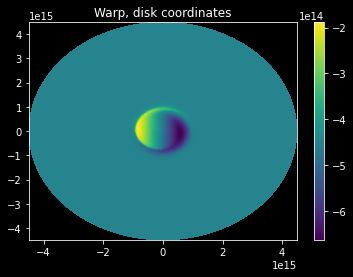

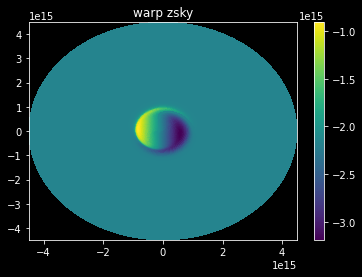

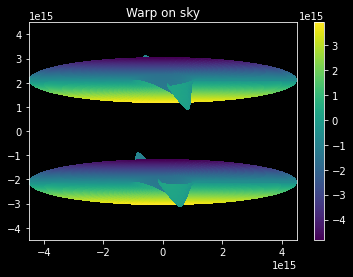

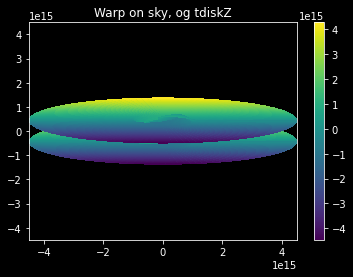

tdiskZ min -4837375782639755.0
tdiskZ max 4837375782639755.0
zind max 1249.0
zind min 0.0
zind len 7074000
phiind max 129.99998297663544
phiind min 1.7023364552070798e-05
phiind len 7074000
aind max 500.0
aind min 0.0
aind len 7074000


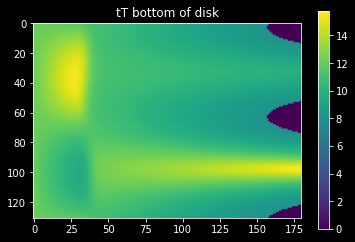

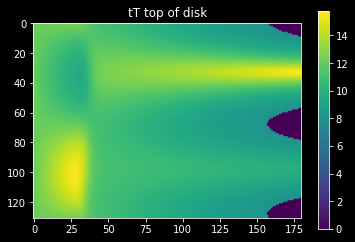

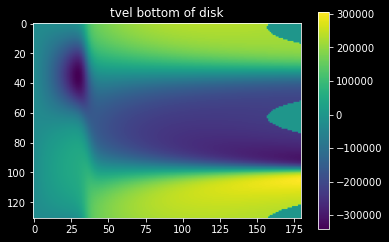

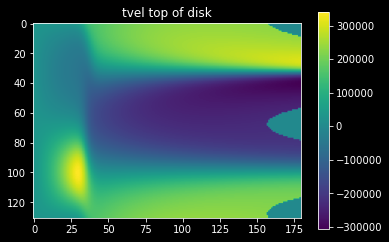

in rt self.sig_col min 0.0
in rt self.sig_col max 0.04759708382733657
in rt self.sig_col mean 0.0036065180758362387


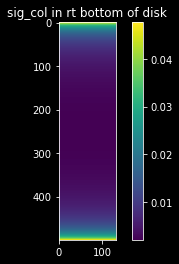

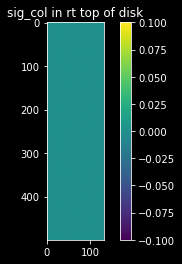

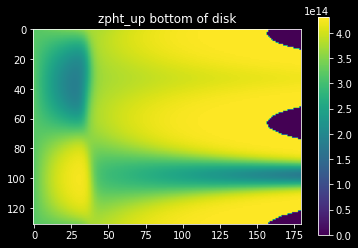

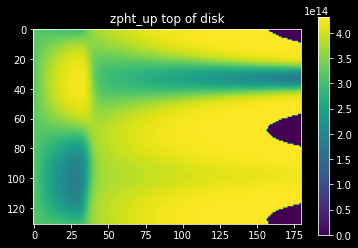

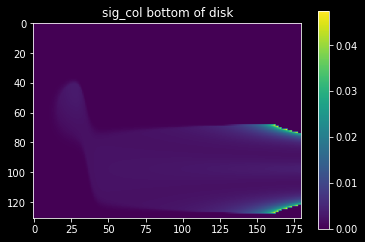

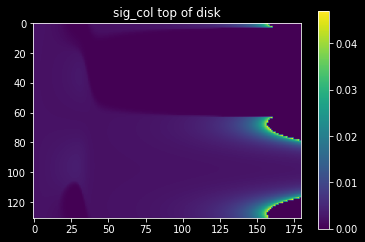

In [6]:
w=restructure.Disk(Tmid0=14, sigbound=[1e-3,np.inf],zmax=30, McoG=1e-4, Aout=300.,incl=inc, aop=aop, w_i=w_inc, w_r0=w_r0_param,w_dr=40,w_pa=pa)


In [7]:
#%run raytrace_3dwarp.py
#x=mine.Disk(Tmid0=14, sigbound=[1e-3,np.inf],zmax=30, McoG=1e-4, Aout=300.,incl=inc, w_i=0, w_r0=20,w_dr=40,w_pa=0)


In [23]:
%run raytrace_3dwarp.py

In [ ]:

total_model(w,imres=0.05,distance=20.,chanmin=-2.24,nchans=15,chanstep=0.32,flipme=False,Jnum=2,freq0=345.79599,xnpix=512,vsys=5.79,PA=312.46,offs=[0.0,0.0],
                modfile='fits_images/warpmodel_fullgridsigcol_wi{}_pa{}_inc{}_aop{}'.format(w_inc, pa, inc, aop),abund=1.,obsv=None,wind=False,isgas=True,includeDust=False,extra=0,bin=1,hanning=True,
                L_cloud=False, tau = [0,], sigma_c = [6,], velocity_c =[2,],manual_chan_params=False,response_function=False)



zcf max 448793612100000.0
zcf min 1495978707000.0
dz max 358124606399.5625
dz min -447297633393000.0
dz shape (500, 131, 1250)
X shape (131, 180)
X_0 0.0
X_-1 4487936121000000.0
Y_0 0.0
Y_-1 0.0
zmax 448793612100000.0
tdiskZmax 4253668000955257.0
zind max 1249.0
zind min 0.0
zind len 7074000
aind max 500.0
aind min 0.0
aind len 7074000
phiind max 130.0
phiind min 0.0
phiind len 7074000


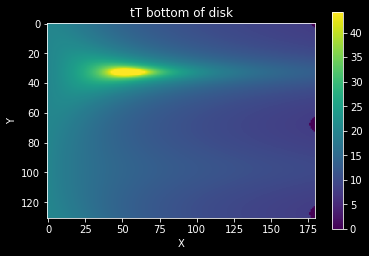

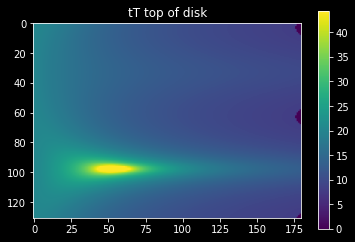

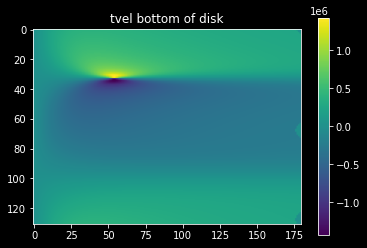

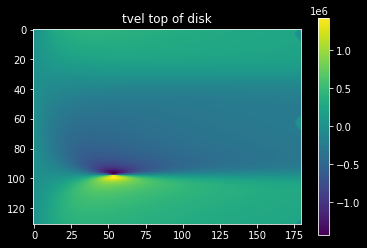

in rt self.sig_col min 0.0
in rt self.sig_col max 0.04409618294981014
in rt self.sig_col mean 0.00024021291756304568


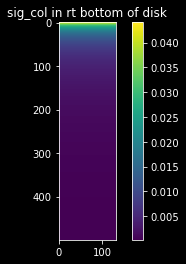

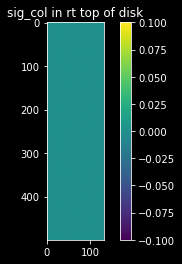

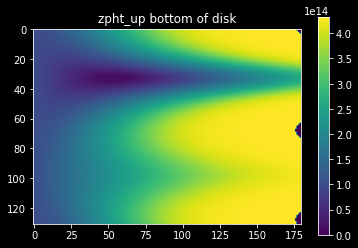

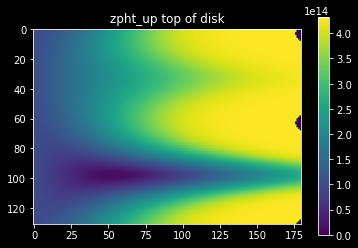

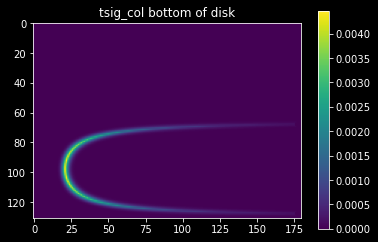

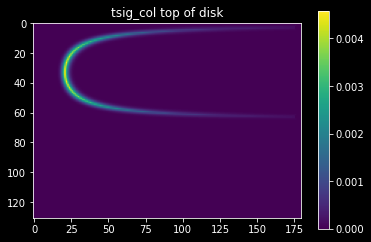

In [ ]:
#%run raytrace.py
#y=original.Disk(Tmid0=14, sigbound=[1e-3,np.inf],zmax=30, McoG=1e-4, Aout=300.,incl=inc)
y=original.Disk(Tmid0=14, sigbound=[1e-3,np.inf],zmax=30, McoG=1e-4, Aout=300.,incl=58)

In [ ]:
%run raytrace.py

In [ ]:

total_model(y,imres=0.05,distance=20.,chanmin=-2.24,nchans=15,chanstep=0.32,flipme=False,Jnum=2,freq0=345.79599,xnpix=512,vsys=5.79,PA=312.46,offs=[0.0,0.0],
                modfile='fits_images/kevinmodel_inc{}'.format(inc),abund=1.,obsv=None,wind=False,isgas=True,includeDust=False,extra=0,bin=1,hanning=True,
                L_cloud=False, tau = [0,], sigma_c = [6,], velocity_c =[2,],manual_chan_params=False,response_function=False)

'''
hdul = fits.open('kevinmodel_inc{}'.format(inc), mode='update')
hdul[0].header['RESTFRQ'] = 345.7959899e9  # Example: CO(2-1) in Hz
hdul[0].header['BUNIT'] = 'Jansky'
hdul.flush()
hdul.close()
'''


"\nhdul = fits.open('kevinmodel_inc{}'.format(inc), mode='update')\nhdul[0].header['RESTFRQ'] = 345.7959899e9  # Example: CO(2-1) in Hz\nhdul[0].header['BUNIT'] = 'Jansky'\nhdul.flush()\nhdul.close()\n"

In [25]:
'''making moment maps'''

hdul = fits.open('fits_images/warpmodel_fullgridsigcol_wi{}_pa{}_inc{}.fits'.format(w_inc, pa, inc), mode='update')
hdul[0].header['RESTFRQ'] = 345.7959899e9  # Example: CO(2-1) in Hz
hdul[0].header['BUNIT'] = 'Jansky'
hdul.flush()
hdul.close()



In [ ]:
hdul = fits.open('fits_images/kevinmodel_inc{}.fits'.format(inc), mode='update')
hdul[0].header['RESTFRQ'] = 345.7959899e9  # Example: CO(2-1) in Hz
hdul[0].header['BUNIT'] = 'Jansky'
hdul.flush()
hdul.close()

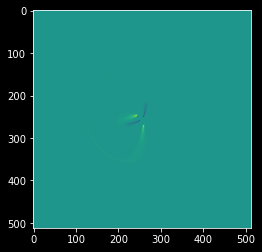

In [31]:
kep = fits.open('fits_images/kevinmodel_inc{}.fits'.format(inc))
kep_data = kep["PRIMARY"].data

warp = fits.open('fits_images/warpmodel_fullgridsigcol_wi{}_pa{}_inc{}.fits'.format(w_inc, pa, inc))
warp_data = warp["PRIMARY"].data

resid = warp_data-kep_data
plt.imshow(resid[3,:,:])

In [35]:
res = fits.open("fits_images/resid_test.fits", mode="update")
res["PRIMARY"].data = resid
res.flush()
res.close()

In [41]:
hdul = fits.open("fits_images/resid_test.fits", mode="update")
hdul[0].header['RESTFRQ'] = 345.7959899e9  # Example: CO(2-1) in Hz
hdul[0].header['BUNIT'] = 'Jansky'
hdul.flush()
hdul.close()

In [42]:
path = "fits_images/resid_test.fits"
data, velax = bm.load_cube(path)
rms = bm.estimate_RMS(data=data, N=1)
m0 = bm.collapse_zeroth(velax=velax, data=data, rms=rms)
bm.save_to_FITS(moments=m0, method='zeroth', path=path)

In [ ]:
path = 'fits_images/warpmodel_fullgridsigcol_wi{}_pa{}_inc{}.fits'.format(w_inc, pa, inc)
data, velax = bm.load_cube(path)
rms = bm.estimate_RMS(data=data, N=1)
m0 = bm.collapse_zeroth(velax=velax, data=data, rms=rms)
bm.save_to_FITS(moments=m0, method='zeroth', path=path)

In [ ]:
path = 'fits_images/kevinmodel_inc{}.fits'.format(inc)
data, velax = bm.load_cube(path)
rms = bm.estimate_RMS(data=data, N=1)
m0 = bm.collapse_zeroth(velax=velax, data=data, rms=rms)
bm.save_to_FITS(moments=m0, method='zeroth', path=path)

In [ ]:
with_warp = fits.open('fits_images/warpmodel_fullgridsigcol_wi{}_pa{}_inc{}_M0.fits'.format(w_inc, pa, inc))
with_warp_data = with_warp["PRIMARY"].data

no_warp = fits.open('fits_images/kevinmodel_inc{}_M0.fits'.format(inc))
no_warp_data = no_warp["PRIMARY"].data



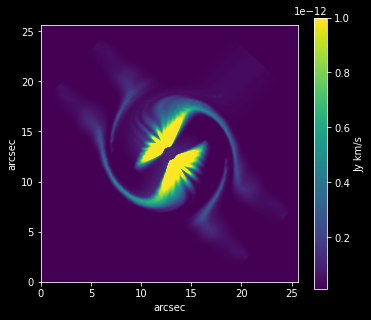

In [29]:
fig, ax = plt.subplots()
#, vmin=0, vmax=2, 
plt.imshow(with_warp_data,extent=[0,25.6,0,25.6], vmin=1e-14,vmax=1e-12)
plt.colorbar(label="Jy km/s")
ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
fig.set_size_inches(5.75, 5)

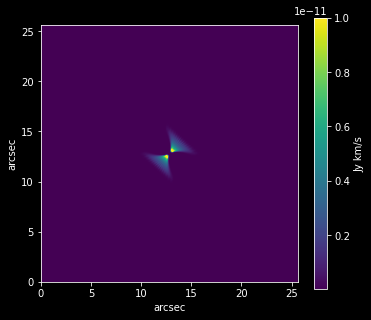

In [ ]:
fig, ax = plt.subplots()
#, vmin=0, vmax=2, 
plt.imshow(no_warp_data,extent=[0,25.6,0,25.6], vmin=1e-18,vmax=1e-11)
plt.colorbar(label="Jy km/s")
ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
fig.set_size_inches(5.75, 5)